In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import gym

**State observation**:
    
    Type: Box(4)

    Num     Observation               Min                     Max
    0       Cart Position             -4.8                    4.8
    1       Cart Velocity             -Inf                    Inf
    2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
    3       Pole Angular Velocity     -Inf                    Inf

- For this project, I will describe the state of the pendulum using only the angle and angular velocity of the pole, ignoring the position and the velocity of cart.

**Actions**:

    Type: Discrete(2)
    
    Num   Action
    0     Push cart to the left
    1     Push cart to the right

In [12]:
env = gym.make('CartPole-v0')
env.reset()

print("Number of actions: " + str(env.action_space.n))
print("Observation space: " + str(env.observation_space))
print("Max. values of observation space:" + str(env.observation_space.high))
print("Min. values of observation space:" + str(env.observation_space.low))

Number of actions: 2
Observation space: Box(4,)
Max. values of observation space:[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Min. values of observation space:[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [19]:
def state_filter(state):
    """ only use the angle and the angular velocity of the pole to describe the state"""
    
    return state[[2,3]]

I generate random samples $S$ in this setting by simulating a uniform random number (max 100) of uniform random actions from the initial state. If the pendulum fell within this sequence, the procedure was repeated.

In [3]:
def random_action():
    """ return a random action: either 0 (left) or 1 (right)"""
    action = env.action_space.sample()  
    return action

In [104]:
def generate_init_states_S():
    """this function returns a list of randomly generated initial states from the CartPole-v0 environment """
    
    n_actions = np.random.randint(low=1, high=101)                   # how many actions to generate
    seq_actions = np.random.randint(low=0,high=2,size=rand_actions)  # random sequence of actions

    init_states_S = []   # to store initial states

    env = gym.make('CartPole-v0')
    env.reset()
    env.action_space.seed(16)

    for action in seq_actions:

        state, reward, done, info = env.step(action)  # implement the actions in the random sequence

        init_states_S.append(state)                   # append the environment state to list (here, I store all 4 state observations: not only angular velocity and angle)

        if done: # the episode ends either if the pole is > 15 deg from vertical or the cart move by > 2.4 unit from the centre

            env.reset()    
            
    env.close()
            
    return init_states_S
    

In [105]:
generate_init_states_S()[:5] # display 5 randomly generated states

[array([ 0.02639155,  0.15168763,  0.03968826, -0.28684664]),
 array([ 0.0294253 ,  0.34622177,  0.03395132, -0.56675278]),
 array([ 0.03634974,  0.15064041,  0.02261627, -0.26357003]),
 array([ 0.03936255,  0.34543236,  0.01734487, -0.54903462]),
 array([ 0.0462712 ,  0.15007111,  0.00636418, -0.25093769])]

episode 19 finished after 22 timesteps. Total reward: 22.0


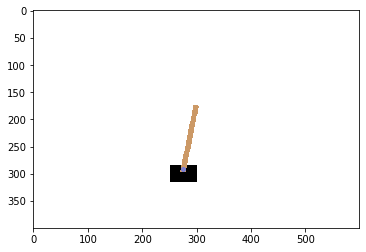

In [108]:
nb_episodes = 20
nb_timesteps = 100
img = plt.imshow(env.render(mode='rgb_array')) # only call this once

for episode in range(nb_episodes):  # iterate over the episodes
    state = env.reset()             # initialise the environment
    rewards = []
    
    for t in range(nb_timesteps):    # iterate over time steps
        #env.render()                 # display the environment
        img.set_data(env.render(mode='rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, info = env.step(policy())  # implement the action chosen by the policy
        rewards.append(reward)      # add 1 to the rewards list
        
        if done: # the episode ends either if the pole is > 15 deg from vertical or the cart move by > 2.4 unit from the centre
            cumulative_reward = sum(rewards)
            print("episode {} finished after {} timesteps. Total reward: {}".format(episode, t+1, cumulative_reward))  
            break
    
env.close()

In [112]:
from gym import wrappers

env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

DependencyNotInstalled: Found neither the ffmpeg nor avconv executables. On OS X, you can install ffmpeg via `brew install ffmpeg`. On most Ubuntu variants, `sudo apt-get install ffmpeg` should do it. On Ubuntu 14.04, however, you'll need to install avconv with `sudo apt-get install libav-tools`.

In [113]:
!conda install -c conda-forge ffmpeg --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    ffmpeg-4.3.1               |       ha925a31_0        26.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        29.2 MB

The following NEW packages will be INSTALLED:

  ffmpeg             conda-forge/win-64::ffmpeg-4.3.1-ha925a31_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py37haa95532_0 --> conda-forge::conda-4.9.2-py37h03978a9_0




ffmpeg-4.3.1         | 26.2 MB   |            |   0% 
ffmpeg-4.3.1         | 26.2 MB   |            |   0% 
ffmpeg-4.3.1    


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))